In [85]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# i found these libraires online to use for normalizing the f1 scores of each algorithm t0 use for weigths
from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [86]:
df = pd.read_csv('fetal_health.csv')
df['fetal_health'] = df['fetal_health'].replace({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [87]:
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [88]:
df['fetal_health'].value_counts(normalize = True)

fetal_health
Normal          0.778457
Suspect         0.138758
Pathological    0.082785
Name: proportion, dtype: float64

In [89]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

clf2 = RandomForestClassifier(random_state = 0)

clf3 = AdaBoostClassifier(random_state=0)


# Fitting model on training data
clf.fit(train_X, train_y)
clf2.fit(train_X,train_y)
clf3.fit(train_X,train_y)


# Predictions on test set
y_pred = clf.predict(test_X)
y_pred2 = clf2.predict(test_X)
y_pred3 = clf3.predict(test_X)


In [90]:
dt_f1 = f1_score(test_y, y_pred, average='macro')
rf_f1 = f1_score(test_y, y_pred2, average='macro')
ab_f1 = f1_score(test_y, y_pred3, average='macro')

f1_scores = [dt_f1, rf_f1, ab_f1]

weights = normalize([f1_scores], norm='l1')[0]
weights

array([0.34188424, 0.33992616, 0.3181896 ])

In [91]:
clf4 = VotingClassifier(estimators=[
        ('dt', clf), ('rf', clf2), ('ab', clf3)],
        voting='soft',
        weights=weights)

clf4.fit(train_X,train_y)
y_pred4 = clf4.predict(test_X)

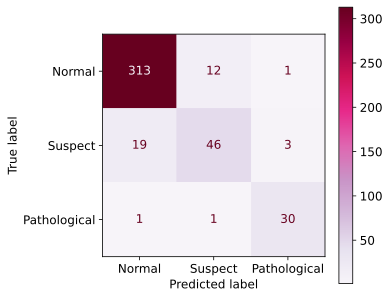

In [92]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = ['Normal', 'Suspect', 'Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Suspect', 'Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("confusion_mat.svg")

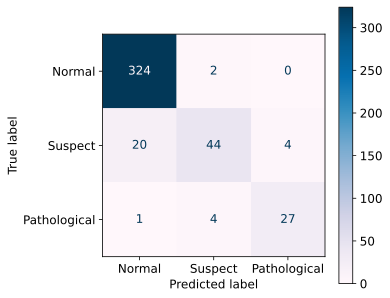

In [93]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred2, labels = ['Normal', 'Suspect', 'Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Suspect', 'Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

plt.savefig("confusion_mat2.svg")

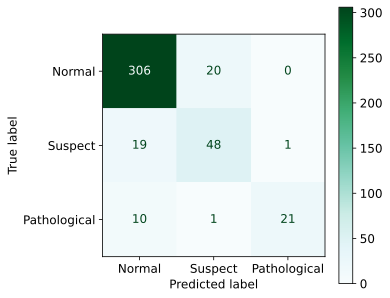

In [94]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred3, labels = ['Normal', 'Suspect', 'Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Suspect', 'Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'BuGn', ax = ax);

plt.savefig("confusion_mat3.svg")

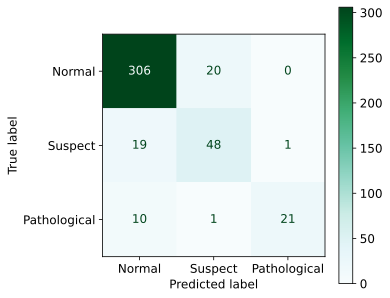

In [95]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred3, labels = ['Normal', 'Suspect', 'Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Suspect', 'Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'BuGn', ax = ax);

plt.savefig("confusion_mat3.svg")

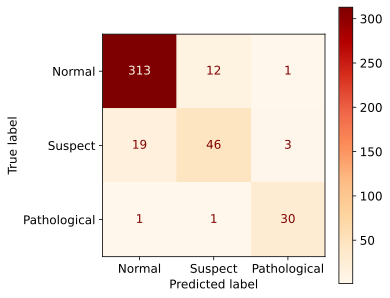

In [96]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred4, labels = ['Normal', 'Suspect', 'Pathological'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Suspect', 'Pathological'])

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'OrRd', ax = ax);

plt.savefig("confusion_mat4.svg")

In [97]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

report_df.to_csv('class_report.csv') 

# Generating Classification Report
report2 = classification_report(test_y, y_pred2, output_dict = True)
report_df2 = pd.DataFrame(report2)

report_df2.to_csv('class_report2.csv') 

# Generating Classification Report
report3 = classification_report(test_y, y_pred3, output_dict = True)
report_df3 = pd.DataFrame(report3)

report_df3.to_csv('class_report3.csv') 

# Generating Classification Report
report4 = classification_report(test_y, y_pred4, output_dict = True)
report_df4 = pd.DataFrame(report4)

report_df4.to_csv('class_report4.csv') 

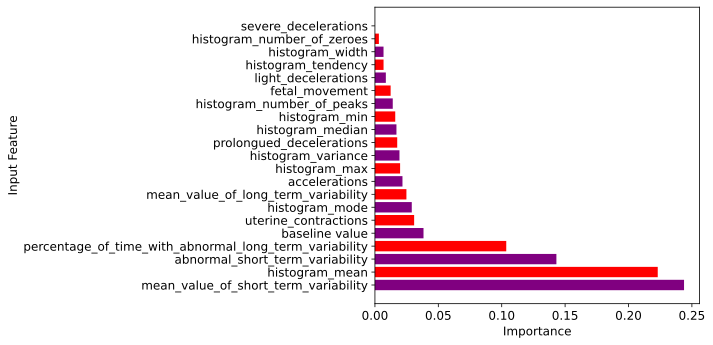

In [98]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'red'])

plt.xlabel("Importance")
plt.ylabel("Input Feature") 
plt.tight_layout()
plt.savefig("feature_imp.svg");

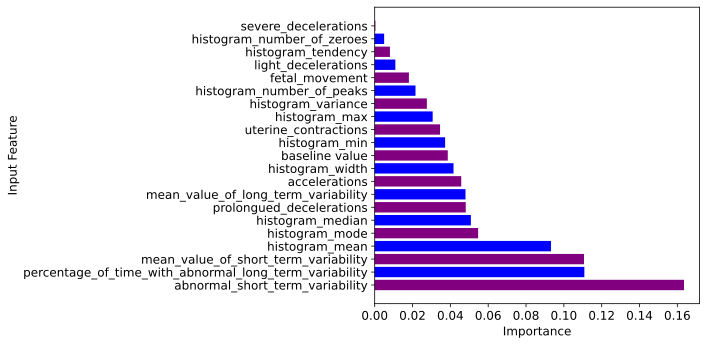

In [99]:
# Storing importance values from the trained model
importance2 = clf2.feature_importances_

# Storing feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp2['Feature'], feature_imp2['Importance'], color = ['purple', 'blue'])

plt.xlabel("Importance")
plt.ylabel("Input Feature") 
plt.tight_layout()
plt.savefig("feature_imp2.svg");

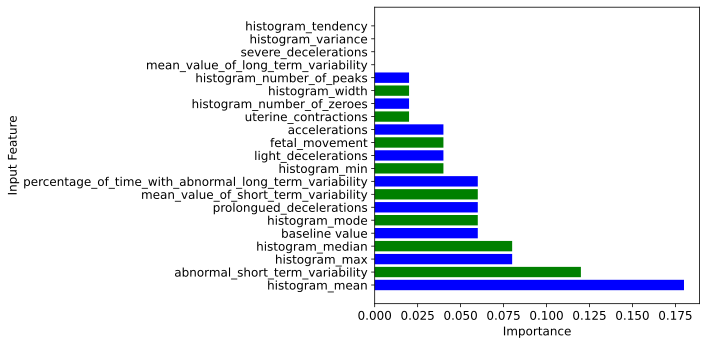

In [100]:
# Storing importance values from the trained model
importance3 = clf3.feature_importances_

# Storing feature importance as a dataframe
feature_imp3 = pd.DataFrame(list(zip(train_X.columns, importance3)),
               columns = ['Feature', 'Importance'])

feature_imp3 = feature_imp3.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp3['Feature'], feature_imp3['Importance'], color = ['blue', 'green'])

plt.xlabel("Importance")
plt.ylabel("Input Feature") 
plt.tight_layout()
plt.savefig("feature_imp3.svg");

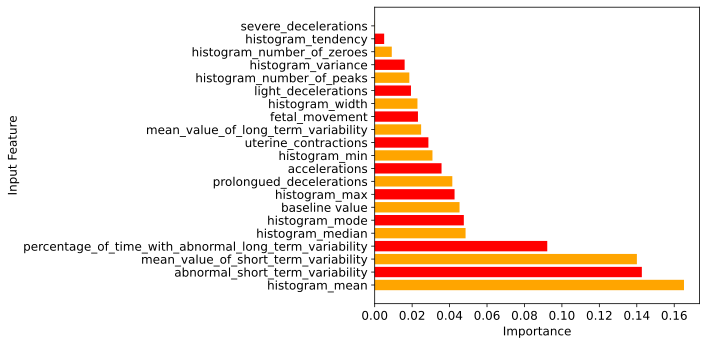

In [101]:
# Storing importance values from the trained model
importance4 = (importance*weights[0] + importance2*weights[1] + importance3*weights[2])

# Storing feature importance as a dataframe
feature_imp4 = pd.DataFrame(list(zip(train_X.columns, importance4)),
               columns = ['Feature', 'Importance'])

feature_imp4 = feature_imp4.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp4['Feature'], feature_imp4['Importance'], color = ['orange', 'red'])

plt.xlabel("Importance")
plt.ylabel("Input Feature") 
plt.tight_layout()
plt.savefig("feature_imp4.svg");

In [102]:
# Save decision tree model
with open('decision_tree.pickle', 'wb') as dt_pickle:
    pickle.dump(clf, dt_pickle)

# Save random forest model
with open('random_forest.pickle', 'wb') as rf_pickle:
    pickle.dump(clf2, rf_pickle)

# Save Ada boost model
with open('ada_boost.pickle', 'wb') as ab_pickle:
    pickle.dump(clf3, ab_pickle)
    
# Save Soft Voting model
with open('soft_voting.pickle', 'wb') as sv_pickle:
    pickle.dump(clf4, sv_pickle)    

# Close the file
dt_pickle.close() 
rf_pickle.close()
ab_pickle.close()
sv_pickle.close()